# 2D Histograms in physt

In [33]:
# Necessary import evil
%matplotlib inline
import physt
from physt import histogram2d, histogramdd, histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.random.normal(100, 1, 1000)
y = np.random.normal(10, 10, 1000)

In [3]:
h2 = histogram2d(x, y, [8, 4], name="Some histogram", axis_names=["x", "y"])
h2

Histogram2D(bins=(8, 4), total=998.0)

In [4]:
h2.frequencies

array([[   0.,    1.,    0.,    0.],
       [   1.,    7.,    4.,    0.],
       [   4.,   46.,   28.,    4.],
       [  17.,  119.,  104.,   12.],
       [  36.,  129.,  134.,   21.],
       [  19.,  112.,   89.,   11.],
       [   7.,   45.,   35.,    1.],
       [   0.,    5.,    6.,    1.]])

## Plotting

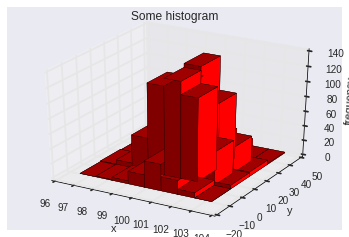

In [5]:
%matplotlib inline
ax = h2.plot(color="r")

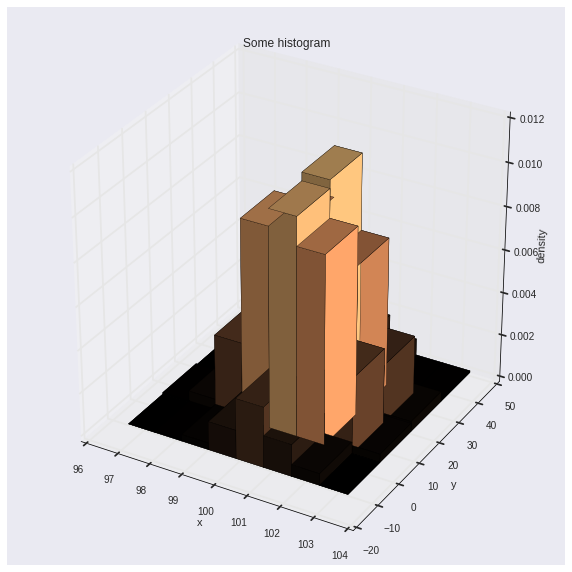

In [6]:
%matplotlib inline
import matplotlib.cm as cm

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax = h2.plot(ax=ax, cmap=cm.copper, density=True)

## Projections

/home/pipek/code/physt/physt/histogram1d.py:292: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


Histogram1D(bins=8, total=998.0)

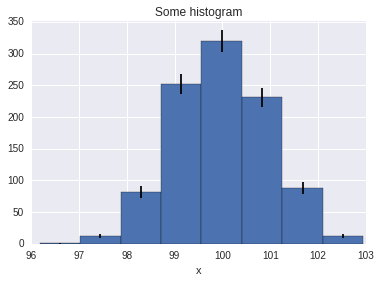

In [7]:
h1 = h2.projection("x")
h1.plot(errors=True)
h1

/home/pipek/code/physt/physt/histogram1d.py:292: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


Histogram1D(bins=4, total=998.0)

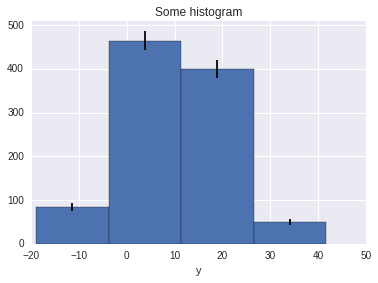

In [8]:
h1 = h2.projection("y")
h1.plot(errors=True)
h1

## N-dimensional histograms

In [9]:
data = [np.random.rand(1000)[:, np.newaxis] for i in range(4)]
data = np.concatenate(data, axis=1)
h5 = histogramdd(data, [3, 2, 2, 3], axis_names="abcd")
h5

HistogramND(bins=(3, 2, 2, 3), total=996.0)

In [10]:
h5.frequencies

array([[[[ 31.,  32.,  33.],
         [ 32.,  28.,  23.]],

        [[ 31.,  21.,  37.],
         [ 29.,  24.,  25.]]],


       [[[ 22.,  22.,  34.],
         [ 24.,  25.,  22.]],

        [[ 30.,  28.,  30.],
         [ 29.,  25.,  31.]]],


       [[[ 26.,  27.,  30.],
         [ 30.,  30.,  26.]],

        [[ 16.,  31.,  33.],
         [ 26.,  27.,  26.]]]])

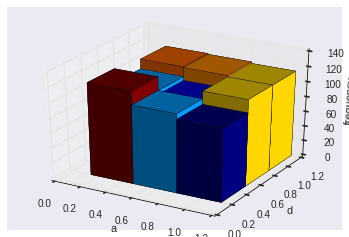

In [11]:
h5.projection("a", "d").plot();

/home/pipek/code/physt/physt/histogram1d.py:292: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


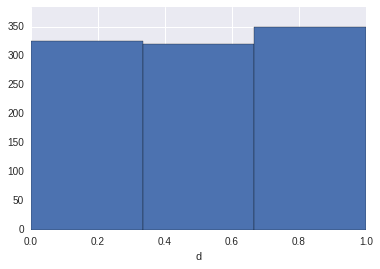

In [12]:
h5.projection("d").plot();

In [13]:
import seaborn as sns
iris = sns.load_dataset('iris')

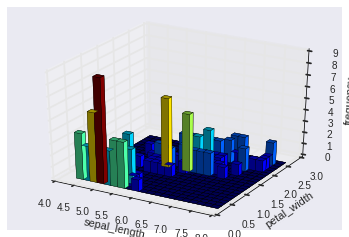

In [14]:
iris_hist = histogramdd(iris[["sepal_length", "petal_width"]], 20)
iris_hist.plot()

/home/pipek/code/physt/physt/histogram1d.py:292: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


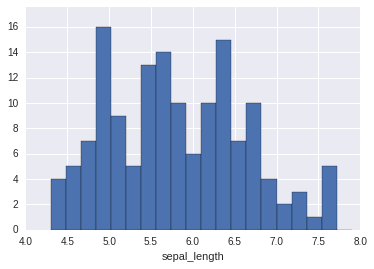

In [15]:
iris_hist.projection("sepal_length").plot()

In [39]:
freq, edges = np.histogramdd(iris[["sepal_length", "petal_width"]].as_matrix(), 20)
freq2, edges2 = np.histogramdd(iris[["sepal_length", "petal_width"]].as_matrix(), edges)
print(physt.histogram_nd.calculate_frequencies(iris[["sepal_length", "petal_width"]], 2, edges)[0].sum())
print(np.histogram2d(iris["sepal_length"], iris["petal_width"], edges)[0].sum())
print(freq.sum(), freq2.sum())
print(iris_hist)
print(edges)
print(iris_hist.numpy_bins)
print(iris_hist.projection("sepal_length"))
print(iris_hist.projection("petal_width"))
print(histogram(iris["sepal_length"], 20))

146.0
150.0
150.0 150.0
Histogram2D(bins=(20, 20), total=146.0)
[array([ 4.3 ,  4.48,  4.66,  4.84,  5.02,  5.2 ,  5.38,  5.56,  5.74,
        5.92,  6.1 ,  6.28,  6.46,  6.64,  6.82,  7.  ,  7.18,  7.36,
        7.54,  7.72,  7.9 ]), array([ 0.1 ,  0.22,  0.34,  0.46,  0.58,  0.7 ,  0.82,  0.94,  1.06,
        1.18,  1.3 ,  1.42,  1.54,  1.66,  1.78,  1.9 ,  2.02,  2.14,
        2.26,  2.38,  2.5 ])]
[array([ 4.3 ,  4.48,  4.66,  4.84,  5.02,  5.2 ,  5.38,  5.56,  5.74,
        5.92,  6.1 ,  6.28,  6.46,  6.64,  6.82,  7.  ,  7.18,  7.36,
        7.54,  7.72,  7.9 ]), array([ 0.1 ,  0.22,  0.34,  0.46,  0.58,  0.7 ,  0.82,  0.94,  1.06,
        1.18,  1.3 ,  1.42,  1.54,  1.66,  1.78,  1.9 ,  2.02,  2.14,
        2.26,  2.38,  2.5 ])]
Histogram1D(bins=20, total=146.0)
Histogram1D(bins=20, total=146.0)
Histogram1D(bins=20, total=150.0)


In [17]:
iris_hist.bins[0][:,0]

array([ 4.3 ,  4.48,  4.66,  4.84,  5.02,  5.2 ,  5.38,  5.56,  5.74,
        5.92,  6.1 ,  6.28,  6.46,  6.64,  6.82,  7.  ,  7.18,  7.36,
        7.54,  7.72])

In [18]:
edges[0][1:] - iris_hist.bins[0][:,1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [19]:
edges[1][1:] - iris_hist.bins[1][:,1]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

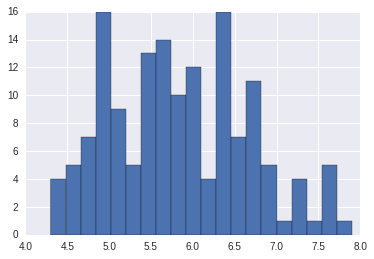

In [20]:
iris["sepal_length"].hist(bins=20)

/home/pipek/code/physt/physt/histogram1d.py:292: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


array([ 4.25,  4.75,  5.25,  5.75,  6.25,  6.75,  7.25,  7.75,  8.25])

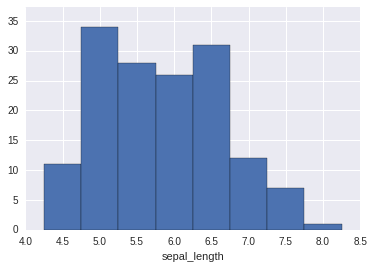

In [21]:
from physt import histogram
irs = histogram(iris["sepal_length"], "fixed_width", 0.5, align=0.25)
irs.plot()
irs.numpy_bins

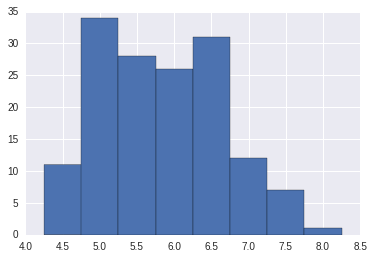

In [22]:
iris["sepal_length"].hist(bins=irs.numpy_bins)

In [23]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
